In [1]:
#################################
#Import all the modules
#################################
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import os
from glob import glob
import librosa
from torch.utils.data import Dataset
import pickle
from tqdm import tqdm

In [2]:
starts_with_map = {
    # 'HIM046_0.8_cdsw_1.wav': 'Hin',
    # 'HIM046_0.8_cdsw_2.wav': 'Eng',
    # 'HIM046_0.8_cdsw_3.wav': 'Eng',
    # 'HIM046_0.8_cdsw_4.wav': 'Hin',
    # 'HIM046_0.8_cdsw_5.wav': 'Eng',
    # 'HIM046_0.8_cdsw_6.wav': 'Hin',
    # 'HIM046_0.8_cdsw_7.wav': 'Hin',
    # 'HIM046_0.8_cdsw_8.wav': 'Hin',
    # 'HIM046_0.8_cdsw_9.wav': 'Hin',
    # 'HIM046_0.8_cdsw_10.wav': 'Hin',
    # 'HIM046_0.8_cdsw_11.wav': 'Hin',
    # 'HIM046_0.8_cdsw_12.wav': 'Hin',
    # 'HIM046_0.8_cdsw_13.wav': 'Hin',
    # 'HIM046_0.8_cdsw_14.wav': 'Hin',
    # 'HIM046_0.8_cdsw_15.wav': 'Hin',
    # 'HIM046_0.8_cdsw_16.wav': 'Hin',
    # 'HIM046_0.8_cdsw_17.wav': 'Hin',
    # 'HIM046_0.8_cdsw_18.wav': 'Hin',
    # 'HIM046_0.8_cdsw_19.wav': 'Hin',
    # 'HIM046_0.8_cdsw_20.wav': 'Hin',
    # 'HIM046_0.8_cdsw_21.wav': 'Hin',
    # 'HIM046_0.8_cdsw_22.wav': 'Eng',
    # 'HIM046_0.8_cdsw_23.wav': 'Hin',
    # 'HIM046_0.8_cdsw_24.wav': 'Hin',
    # 'HIM046_0.8_cdsw_25.wav': 'Hin',
    # 'HIM046_0.8_cdsw_26.wav': 'Hin',
    # 'HIM046_0.8_cdsw_27.wav': 'Hin',
    # 'HIM046_0.8_cdsw_28.wav': 'Hin',
    # 'HIM046_0.8_cdsw_29.wav': 'Hin',
    # 'HIM046_0.8_cdsw_30.wav': 'Hin',
    # 'HIM046_0.8_cdsw_31.wav': 'Hin',
    # 'HIM046_0.8_cdsw_32.wav': 'Hin',
    # 'HIM046_0.8_cdsw_33.wav': 'Hin',
    # 'HIM046_0.8_cdsw_34.wav': 'Hin',
    # 'HIM046_0.8_cdsw_35.wav': 'Hin',
    # 'HIM046_0.8_cdsw_36.wav': 'Hin',
    # 'HIM046_0.8_cdsw_37.wav': 'Hin',
    # 'HIM046_0.8_cdsw_38.wav': 'Hin',
    # 'HIM046_0.8_cdsw_39.wav': 'Hin',
    # 'HIM046_0.8_cdsw_40.wav': 'Hin',
    # 'HIM046_0.8_cdsw_41.wav': 'Hin',
    # 'HIM046_0.8_cdsw_42.wav': 'Hin',
    # 'HIM046_0.8_cdsw_43.wav': 'Hin',
    # 'HIM046_0.8_cdsw_44.wav': 'Hin',
    # 'HIM046_0.8_cdsw_45.wav': 'Hin',
    # 'HIM046_0.8_cdsw_46.wav': 'Hin',
    # 'HIM046_0.8_cdsw_47.wav': 'Hin',
    
    # 'HIM046_1_cdsw_1.wav': 'Hin',
    # 'HIM046_1_cdsw_2.wav': 'Hin',
    # 'HIM046_1_cdsw_3.wav': 'Eng',
    # 'HIM046_1_cdsw_4.wav': 'Eng',
    # 'HIM046_1_cdsw_5.wav': 'Eng',
    # 'HIM046_1_cdsw_6.wav': 'Hin',
    # 'HIM046_1_cdsw_7.wav': 'Hin',
    # 'HIM046_1_cdsw_8.wav': 'Eng',
    # 'HIM046_1_cdsw_9.wav': 'Hin',
    # 'HIM046_1_cdsw_10.wav': 'Eng',
    # 'HIM046_1_cdsw_11.wav': 'Hin',
    # 'HIM046_1_cdsw_12.wav': 'Eng',
    # 'HIM046_1_cdsw_13.wav': 'Hin',
    # 'HIM046_1_cdsw_14.wav': 'Hin',
    # 'HIM046_1_cdsw_15.wav': 'Eng',
    # 'HIM046_1_cdsw_16.wav': 'Hin',
    # 'HIM046_1_cdsw_17.wav': 'Hin',
    # 'HIM046_1_cdsw_18.wav': 'Eng',
    # 'HIM046_1_cdsw_19.wav': 'Hin',
    # 'HIM046_1_cdsw_20.wav': 'Eng',
    # 'HIM046_1_cdsw_21.wav': 'Hin',
    # 'HIM046_1_cdsw_22.wav': 'Eng',
    # 'HIM046_1_cdsw_23.wav': 'Hin',
    # 'HIM046_1_cdsw_24.wav': 'Hin',
    # 'HIM046_1_cdsw_25.wav': 'Eng',
    # 'HIM046_1_cdsw_26.wav': 'Hin',
    # 'HIM046_1_cdsw_27.wav': 'Hin',
    # 'HIM046_1_cdsw_28.wav': 'Eng',
    # 'HIM046_1_cdsw_29.wav': 'Hin',
    # 'HIM046_1_cdsw_30.wav': 'Eng',
    # 'HIM046_1_cdsw_31.wav': 'Hin',
    # 'HIM046_1_cdsw_32.wav': 'Eng',
    # 'HIM046_1_cdsw_33.wav': 'Hin',
    # 'HIM046_1_cdsw_34.wav': 'Eng',
    
    
    'HIM046_2_cdsw_1.wav': 'Hin',
    'HIM046_2_cdsw_2.wav': 'Eng',
    'HIM046_2_cdsw_3.wav': 'Hin',
    'HIM046_2_cdsw_4.wav': 'Hin',
    'HIM046_2_cdsw_5.wav': 'Eng',
    'HIM046_2_cdsw_6.wav': 'Eng',
    'HIM046_2_cdsw_7.wav': 'Eng',
    'HIM046_2_cdsw_8.wav': 'Hin',
    'HIM046_2_cdsw_9.wav': 'Hin',
    'HIM046_2_cdsw_10.wav': 'Hin',
    'HIM046_2_cdsw_11.wav': 'Hin',
    'HIM046_2_cdsw_12.wav': 'Eng',
    'HIM046_2_cdsw_13.wav': 'Hin',
    'HIM046_2_cdsw_14.wav': 'Hin',
    'HIM046_2_cdsw_15.wav': 'Eng',
    'HIM046_2_cdsw_16.wav': 'Eng',
    'HIM046_2_cdsw_17.wav': 'Eng',
    'HIM046_2_cdsw_18.wav': 'Hin',
    'HIM046_2_cdsw_19.wav': 'Hin',
    'HIM046_2_cdsw_20.wav': 'Eng',
    'HIM046_2_cdsw_21.wav': 'Eng',
    'HIM046_2_cdsw_22.wav': 'Eng',
    'HIM046_2_cdsw_23.wav': 'Hin',
    'HIM046_2_cdsw_24.wav': 'Hin',
    'HIM046_2_cdsw_25.wav': 'Eng',
    'HIM046_2_cdsw_26.wav': 'Eng',
    'HIM046_2_cdsw_27.wav': 'Eng',
    'HIM046_2_cdsw_28.wav': 'Hin',
    
    'HIM046_5_cdsw_1.wav': 'Eng',
    'HIM046_5_cdsw_2.wav': 'Eng',
    'HIM046_5_cdsw_3.wav': 'Hin',
    'HIM046_5_cdsw_4.wav': 'Eng',
    'HIM046_5_cdsw_5.wav': 'Eng',
    'HIM046_5_cdsw_6.wav': 'Hin',
    'HIM046_5_cdsw_7.wav': 'Hin',
    'HIM046_5_cdsw_8.wav': 'Hin',
    'HIM046_5_cdsw_9.wav': 'Eng',
    'HIM046_5_cdsw_10.wav': 'Eng',
    'HIM046_5_cdsw_11.wav': 'Hin',
    'HIM046_5_cdsw_12.wav': 'Eng',
    'HIM046_5_cdsw_13.wav': 'Hin',
    'HIM046_5_cdsw_14.wav': 'Hin',
    'HIM046_5_cdsw_15.wav': 'Eng',
    
    
    'HIM046_7_cdsw_1.wav': 'Hin',
    'HIM046_7_cdsw_2.wav': 'Eng',
    'HIM046_7_cdsw_3.wav': 'Eng',
    'HIM046_7_cdsw_4.wav': 'Hin',
    'HIM046_7_cdsw_5.wav': 'Hin',
    'HIM046_7_cdsw_6.wav': 'Hin',
    'HIM046_7_cdsw_7.wav': 'Hin',
    'HIM046_7_cdsw_8.wav': 'Eng',
    'HIM046_7_cdsw_9.wav': 'Eng',
    'HIM046_7_cdsw_10.wav': 'Hin',
    'HIM046_7_cdsw_11.wav': 'Eng',
    'HIM046_7_cdsw_12.wav': 'Eng',
    
    
    
}

In [3]:
def process_file(path, starts_with = 'Hin'):
    
    """
    Returns Frames, labels corresponding to each frame

    Returns:
        _Frames_ : Signal split into frames
        
        _labels_ : 0 if frame is in Hindi, 1 if frame is in English
    """
    assert starts_with in ['Hin', 'Eng']
    
    _, duration, filename = path.split('/')
    duration = float(duration)
    
    sig, rate = sf.read(path)

    Frames = librosa.util.frame(sig, frame_length=int(rate*0.025), hop_length=int(rate*0.01)).T
    labels = []
    
    for index, frame in enumerate(Frames):
        
        start = index * int(rate*0.01) 
        
        for i in range(100):
            
            if i * duration <= float(start / rate) < (i+1) * duration:
                
                if i%2 == 0:
                    
                    labels.append(0) 
                else:
                    
                    labels.append(1)
            
                break
            
    labels = np.array(labels)  
      
    if starts_with == 'Eng':
        labels = 1 -labels  
              
    return Frames, labels

In [15]:
def read_dir(data_dir = 'wav_file_syn_cd_sw_awgn'):
    
    data = np.array([0]*400)
    labels = np.array([0])
    for dirpath, dirnames, filenames in os.walk(data_dir):
        
        for file in filenames:
            
            if file[:3] == 'HIM':
                
                p = dirpath.replace('\\', '/') + '/'+ file
                
                if file in starts_with_map.keys():
                        
                    d, l = process_file(p, starts_with_map[file])
                    print(file)
                    data = np.vstack((data, d))
                    labels = np.concatenate((labels, l))
    
    
    return data[1:, :], labels[1:]         
        

In [20]:
import pickle

with open('ld_dataset.pkl', 'wb') as f:
    pickle.dump(Data, f)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torchaudio

In [36]:
class LDNet(nn.Module):
    
    def __init__(self, rate, n_mels):
        super(LDNet, self).__init__()
        
        self.rate = rate
        self.n_mels = n_mels
        
        self.mel_layer = nn.Sequential(
            torchaudio.transforms.MelSpectrogram(sample_rate=rate, n_fft=512, win_length=400, hop_length=401, window_fn=torch.hamming_window, n_mels=self.n_mels),
            nn.BatchNorm1d(self.n_mels, momentum=0.1, affine=True)
        )
        self.linear_layer = nn.Sequential(
            nn.Linear(self.n_mels, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.mel_layer(x).squeeze()
        x = self.linear_layer(x).squeeze()
        return x


In [37]:
mel_layer = torch.nn.Sequential(
            torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=512, win_length=400, hop_length=401, window_fn=torch.hamming_window, n_mels=40),
            nn.BatchNorm1d(40, momentum=0.1, affine=True)
)
sig = torch.FloatTensor(np.random.randn(16, 400))
model = LDNet(16000, 40)
model(sig)

tensor([0.5012, 0.4969, 0.4977, 0.4975, 0.4928, 0.4987, 0.4930, 0.4979, 0.4979,
        0.4959, 0.5022, 0.5015, 0.4989, 0.5015, 0.4781, 0.5000],
       grad_fn=<SqueezeBackward0>)

In [80]:
NUM_EPOCHS = 500
LEARNING_RATE = 1e-4
BATCH_SIZE = 32
TRAIN_SPLIT = 0.7
N_MELS = 64

In [81]:
data = np.load('data.npy')
labels = np.load('labels.npy')
train_indices = np.load('train_indices.npy')
test_indices = np.load('test_indices.npy')
data.shape, labels.shape, train_indices.shape, test_indices.shape

((134224, 400), (134224,), (93956,), (40268,))

In [82]:
class LD_Dataset(Dataset):

  def __init__(self, data, labels):
    self.data = data
    self.labels = labels

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return torch.tensor(self.data[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)
  
# dataset =  LD_Dataset(data, labels)
# train_dataset, test_dataset = random_split(dataset, [TRAIN_SPLIT, 1 - TRAIN_SPLIT])
    
train_dataset = LD_Dataset(data[train_indices], labels[train_indices])
test_dataset = LD_Dataset(data[test_indices], labels[test_indices])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [83]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = LDNet(16000, N_MELS).to(device)
model.train()
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
epoch_losses = []

for epoch in (pbar := tqdm(range(NUM_EPOCHS))):
    
    epoch_loss = 0.0
    for frame, label in train_loader:

        frame = frame.to(device)
        label = label.to(device)
        output = model(frame)
        
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    epoch_losses.append(epoch_loss / len(train_loader))
    pbar.set_description(f'Epoch Loss: {epoch_losses[-1]:.3f}')

cuda


Epoch Loss: 0.554: 100%|██████████| 500/500 [5:15:31<00:00, 37.86s/it]     


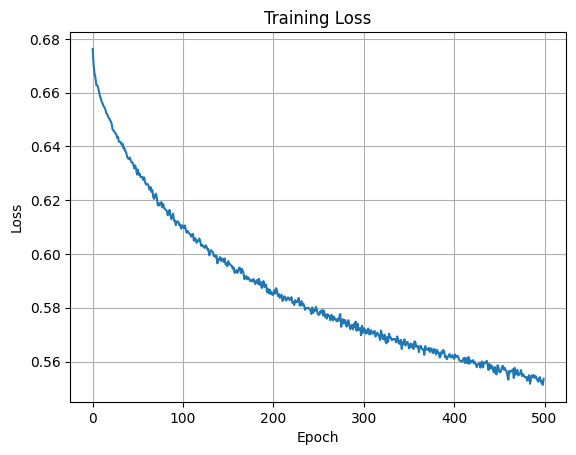

In [86]:
plt.plot(epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.savefig(f'plots/ld_model_big_{NUM_EPOCHS}_{LEARNING_RATE}_{BATCH_SIZE}_{N_MELS}.png')
plt.show()

In [87]:
model.eval()
preds, trues = [], []

eval_loss = 0.0
for frame, label in test_loader:
    frame = frame.to(device)
    label = label.to(device)
    output = model(frame)

    preds.extend(list(output.cpu().detach().numpy()))
    trues.extend(list(label.cpu().detach().numpy()))

    loss = criterion(output, label)
    eval_loss += loss.item()
eval_loss / len(test_loader)

0.7437038184443194

0.5599235124664746


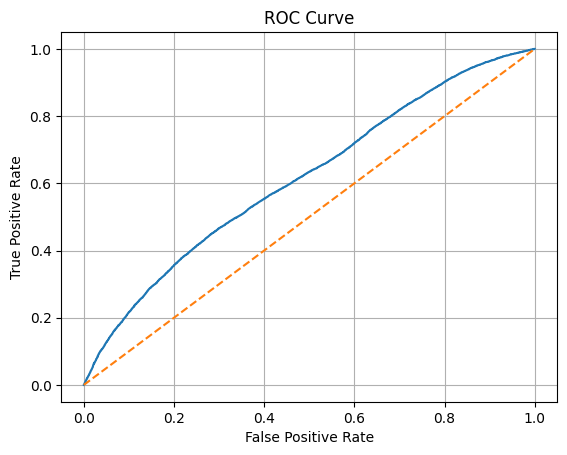

In [88]:
from sklearn.metrics import roc_curve, accuracy_score

print(accuracy_score(trues, np.array(preds) > 0.5))
fpr, tpr, thresholds = roc_curve(trues, preds)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, len(fpr)), np.linspace(0, 1, len(fpr)), linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

In [45]:
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
threshold = thresholds[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer, threshold

(0.4138290479499653, 0.4864327)

In [74]:
torch.save(model, f'chks/ld_model_big_{NUM_EPOCHS}_{LEARNING_RATE}_{BATCH_SIZE}_{N_MELS}.pt')